In [1]:
import numpy as np
import pandas as pd

from utils import params
from utils import postprocess
from train import tf_vgg
from train import skl_train
from visuals import plot as cplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

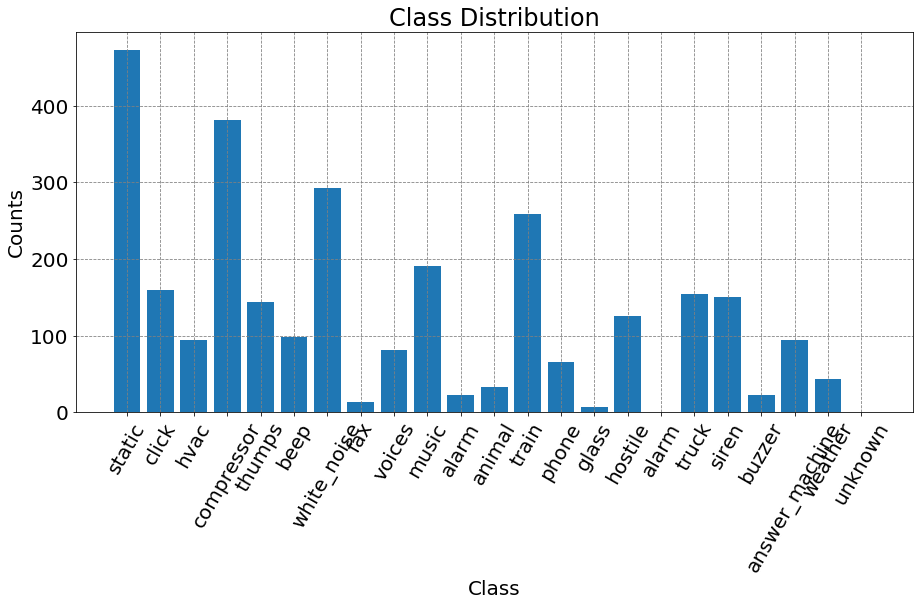

In [3]:
# LOAD DATA AND NORMALIZE
#facility_key = {0:'compressor',1:'not_hostile',2:'hvac',3:'cricket',4:'static',5:'siren',6:'unknown'}
fsave = "./output/pandas/embeddings_16bit.pickle"
df,ndata = postprocess.load_pd_data(fsave)
labels = df['labels'].get_values()

# PLOT LABELS
cplt.plot_labels(labels)

In [ ]:
# FILTER DATA FRAME TO GET STATIC, HVAC, COMPRESSOR
rlabels = [0 if x==0 else 1 for x in labels]

In [ ]:
# TRAIN AND VALIDATE MODELS
# JAT NOTE - CLASS DISTRIBUTION SEEMS TO BE CAUSING IT TO PREDICT ALWAYS COMPRESSOR
# XGBOOST
print "-- Training XGBoost"
clf_xgb = xgb.XGBClassifier(max_depth=13,
                            n_estimators=1800,
                            min_child_weight=1,
                            learning_rate=0.04,
                            subsample=0.8,
                            colsample_bytree=0.6,
                            gamma= 2)
xgb_metrics = skl_train.train_and_eval(ndata,rlabels,clf_xgb,xgb=True,folds=10)

# MLP
print "-- Training MLP"
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),batch_size=64)
mlp_metrics = skl_train.train_and_eval(ndata,rlabels,clf_mlp)

# RANDOM FOREST
print "-- Training Random Forest"
clf_rf = RandomForestClassifier(n_estimators=1800,
                                max_depth=13)
rf_metrics = skl_train.train_and_eval(ndata,rlabels,clf_rf)

In [ ]:
cplt.plot_training_results([xgb_metrics,mlp_metrics,rf_metrics],['XGB','MLP','RF'],style='acc')

In [ ]:
cplt.plot_training_results([xgb_metrics,mlp_metrics,rf_metrics],['XGB','MLP','RF'],style='rec')

In [ ]:
cplt.plot_training_results([xgb_metrics,mlp_metrics,rf_metrics],['XGB','MLP','RF'],style='log')

In [ ]:
cplt.plot_training_results([xgb_metrics,mlp_metrics,rf_metrics],['XGB','MLP','RF'],style='auc')